In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [226]:
Hitters = pd.read_csv('Hitters.csv')

In [227]:
Hitters[:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [228]:
Hitters.shape

(322, 20)

In [229]:
df0 = Hitters.dropna()

In [230]:
df0.shape

(263, 20)

In [231]:
df0[1:5]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [232]:
y = df0.Salary
x = df0.drop(['Salary'],axis = 1) # 1 means column

In [233]:
x[['League','Division','NewLeague']] = pd.get_dummies(x[['League','Division','NewLeague']],drop_first=True)

### 1a) Fit Random forest model with B = 100 bagged, max_features = 10, report test MSE.

In [260]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.5,
                                                test_size = 0.50,random_state=0)

In [261]:
random_forest_Hitters = RandomForestRegressor(max_features = 10,
                                            n_estimators = 100, # bootstrap, how many samples we use
                                            random_state = 1)
random_forest_Hitters.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [262]:
#test MSE

In [263]:
pred = random_forest_Hitters.predict(X_test)
mean_squared_error(y_test,pred)

90143.64631666582

In [238]:
Importance = pd.DataFrame({'Importance':random_forest_Hitters.feature_importances_*100},
                         index = x.columns)
Importance

,Importance
AtBat,6.063471
Hits,4.825391
HmRun,2.515385
Runs,5.490423
RBI,4.479702
Walks,10.042096
Years,1.099970
CAtBat,7.046038
CHits,14.085526
CHmRun,2.306548


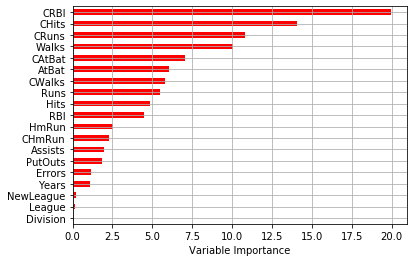

In [239]:
Importance.sort_values(by = 'Importance',axis = 0,ascending = True).plot(kind = 'barh',color='r',)
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

#### The test MSE is 90143.646. From the plot above, the most important factor is CRBI. But if we set the standard that the importance must be greater than 10,there are three factors are the most important,which is CRBI, CHits, CRuns.

### 1b) Gradient boosting with 100 trees, learning rate 0.1, max_depth = 4, report test MSE & mportant predictors.

In [240]:
from sklearn.ensemble import GradientBoostingRegressor

In [241]:
boosted_Hitters = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                          max_depth = 4, random_state =1)
boosted_Hitters.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [242]:
mean_squared_error(y_test,boosted_Hitters.predict(X_test))

96344.8969470074

In [243]:
# larger than random forest, not very good

In [244]:
importance = boosted_Hitters.feature_importances_*100

In [245]:
boosted_imp = pd.DataFrame({'Importance':importance},index = x.columns)
boosted_imp

,Importance
AtBat,4.753850
Hits,6.084695
HmRun,0.111634
Runs,4.458109
RBI,4.136193
Walks,14.172933
Years,1.775501
CAtBat,7.250907
CHits,2.784121
CHmRun,1.204371


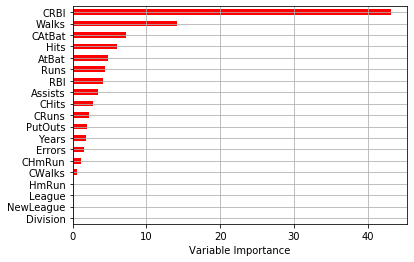

In [246]:
boosted_imp.sort_values(by = 'Importance',axis = 0, ascending= True)\
                   .plot(kind = 'barh',color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.grid()

#### The test MSE is 96344.8969, the predictor CRBI is obviously the most important, and Walks can be also considered as important factors.

### 1c)Multiple linear regression with the most important predictors found by Random forest, find MSE

In [247]:
x1 = df0[['CRBI','CHits','CRuns']]
x1.shape

(263, 3)

In [248]:
y1 = y.values.reshape(-1,1)
y1.shape

(263, 1)

In [249]:
from sklearn.linear_model import LinearRegression

In [273]:
X_train,X_test,y_train,y_test = train_test_split(x1,y1,train_size=0.5,
                                                test_size = 0.50,random_state=0)

In [274]:
result = LinearRegression().fit(X_train,y_train)
prediction = result.predict(X_test)
MSE = mean_squared_error(y_test,prediction)
MSE

167774.99874223841

#### The test MSE is 167774.9987

### 2a)

In [173]:
df = pd.read_csv('bodyfat.csv')

In [174]:
df[:5]

,skinfold,thigh,midarm,bodyfat
0,19.5,43.1,29.1,11.9
1,24.7,49.8,28.2,22.8
2,30.7,51.9,37.0,18.7
3,29.8,54.3,31.1,20.1
4,19.1,42.2,30.9,12.9


In [175]:
r = df[['skinfold','thigh','midarm']]
rXX = r.corr()
rXX

,skinfold,thigh,midarm
skinfold,1.000000,0.923843,0.457777
thigh,0.923843,1.000000,0.084667
midarm,0.457777,0.084667,1.000000


In [275]:
import seaborn as sns

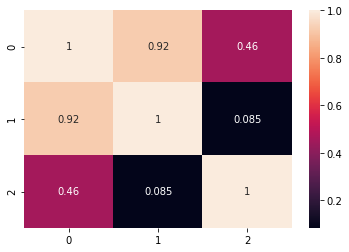

In [276]:
sns.heatmap(rXX,annot = True)

#### X2(thigh circumference) and X3(midarm circuference) show the low correlations

In [177]:
y = df.midarm
x = df[['skinfold','thigh']]

In [178]:
y.shape

(20,)

In [179]:
y = y.values.reshape(-1,1)

In [180]:
y.shape

(20, 1)

In [181]:
result1 = LinearRegression().fit(x,y)

In [182]:
result1.score(x,y)

0.9904403193686466

#### The R^2 is 0.99044, which is close to 1, so midarm circumference is linearly related to the other two predictors.

### 2b)

In [183]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [269]:
from numpy import *
from sklearn.metrics import confusion_matrix, mean_squared_error

In [252]:
rXX = rXX.to_numpy()
rXX

array([[1.        , 0.92384251, 0.45777716],
       [0.92384251, 1.        , 0.0846675 ],
       [0.45777716, 0.0846675 , 1.        ]])

In [265]:
alphas = np.linspace(0.01,1,100)

In [266]:
alphas

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [270]:
VIF1 = []
VIF2 = []
VIF3 = []
for a in range(1,101):
    matrix = ((rXX+(a/100)*mat(eye(3,3))).I)*rXX*((rXX+(a/100)
                                                   *mat(eye(3,3))).I)
    VIF1.append(matrix[0,0])
    VIF2.append(matrix[1,1])
    VIF3.append(matrix[2,2])

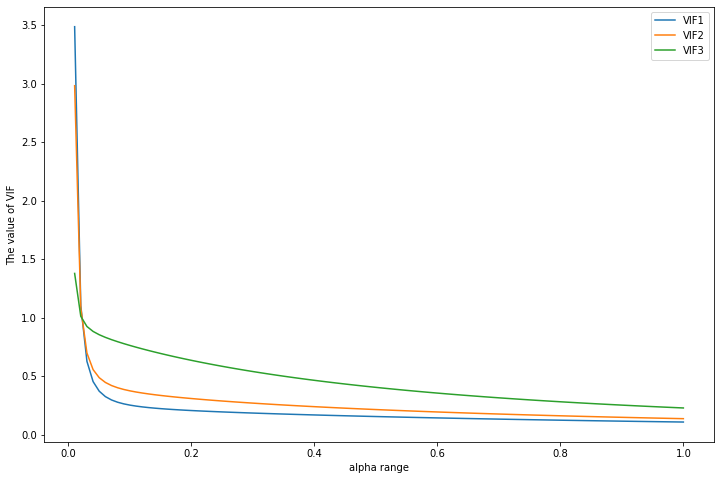

In [272]:
plt.figure(figsize=(12,8))
plt.plot(alphas,VIF1,label = 'VIF1')
plt.plot(alphas,VIF2,label = 'VIF2')
plt.plot(alphas,VIF3,label = 'VIF3')
plt.xlabel('alpha range')
plt.ylabel('The value of VIF')
plt.legend(labels=['VIF1','VIF2','VIF3'],loc='lower right')
plt.legend()

### 3a)

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [197]:
df2 = pd.read_csv('caravan.csv')

In [198]:
df2["Purchase"] = df2.Purchase.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [199]:
x2 = df2.drop(['Purchase'],axis = 1)
y2 = df2.Purchase

In [200]:
df2['PVRAAUT'].value_counts()

0    5813
6       7
9       1
4       1
Name: PVRAAUT, dtype: int64

In [201]:
df2['AVRAAUT'].value_counts()

0    5813
1       6
2       2
3       1
Name: AVRAAUT, dtype: int64

In [202]:
x3 = df2.drop(['Purchase','PVRAAUT','AVRAAUT'],axis = 1)

### 3b)

In [203]:
x3.shape

(5822, 83)

In [204]:
x_train = x3[:1000]

In [205]:
x_test = x3[1000:5822]

In [206]:
y_train = y2[:1000]

In [207]:
y_test = y2[1000:5822]

In [208]:
random_forest_caravan = RandomForestClassifier(max_features = 29,
                                            n_estimators = 500, # bootstrap, how many samples we use
                                            random_state = 1)
random_forest_caravan.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=29, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [209]:
Importance = pd.DataFrame({'Importance':random_forest_caravan.feature_importances_*100},
                         index = x3.columns)
Importance.head()

,Importance
MOSTYPE,3.333823
MAANTHUI,0.978165
MGEMOMV,0.909334
MGEMLEEF,0.816398
MOSHOOFD,1.750794


In [210]:
Importance1 = Importance.sort_values(by = 'Importance',axis = 0, ascending= False)
Importance1[:10]

,Importance
PPERSAUT,3.426791
MOSTYPE,3.333823
MGODGE,3.302695
MOPLHOOG,3.024537
PBRAND,2.804189
MGODPR,2.659090
MKOOPKLA,2.606417
ABRAND,2.326212
MBERMIDD,2.311773
MFWEKIND,2.250384


In [211]:
random_forest_caravan.score(x_test,y_test) #to show the accuracy rate

0.9317710493571132

#### The most important factor is PPERSAUT, Accuracy rate is 0.93177.

### 3c)

In [212]:
boosted_caravan = GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.01,
                                          max_depth = 4, random_state =1)
boosted_caravan = boosted_caravan.fit(x_train,y_train)

In [213]:
Importance_boosted = pd.DataFrame({'Importance':boosted_caravan.feature_importances_*100},
                         index = x3.columns)
Importance_boosted1 = Importance_boosted.sort_values(by = 'Importance',axis = 0, ascending= False)
Importance_boosted1[:10]


,Importance
PPERSAUT,6.722818
MOSTYPE,5.669139
MOPLHOOG,4.964865
MGODGE,4.931586
ABRAND,4.516553
MKOOPKLA,4.513428
MGODPR,4.273577
MBERMIDD,3.792523
PWAPART,2.806437
AMOTSCO,2.775647


In [214]:
boosted_caravan.score(x_test,y_test) # a little bit larger than random forest

0.9334301119867275

#### The most important factor is PPERSAUT, and accuracy rate is 0.93343

### 3d)

In [215]:
knn_caravan = KNeighborsClassifier(n_neighbors =3)
knn_caravan.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [216]:
knn_caravan.score(x_test,y_test)

0.9276233927830776

#### For KNN mode,  the accuracy rate is 0.92762

### 3e)

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
log_reg = LogisticRegression(solver="lbfgs",max_iter = 1000,random_state=1)
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [219]:
log_reg.score(x_test,y_test)

0.93488179178764

#### For logistic regression model, the accuracy rate is 0.93488

In [220]:
# Accuracy rate is larger than the other ones.